In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("router_internet.csv")
G1 = nx.from_pandas_edgelist(df1, "source", "target", create_using=nx.Graph)

In [3]:
# 绘制不同规模随即网络的度分布
# 定义求度分布的函数
def get_pdf(G):
    all_k = [G.degree(i) for i in G.nodes()]
    k = list(set(all_k))
    N = len(G.nodes())

    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:
                c += 1
        Pk.append(c/N)

    return sorted(k), Pk

In [4]:
deg1 = [G1.degree(i) for i in G1.nodes()]

k1, Pk1 = get_pdf(G1)

In [5]:
import matplotlib.pyplot as plt

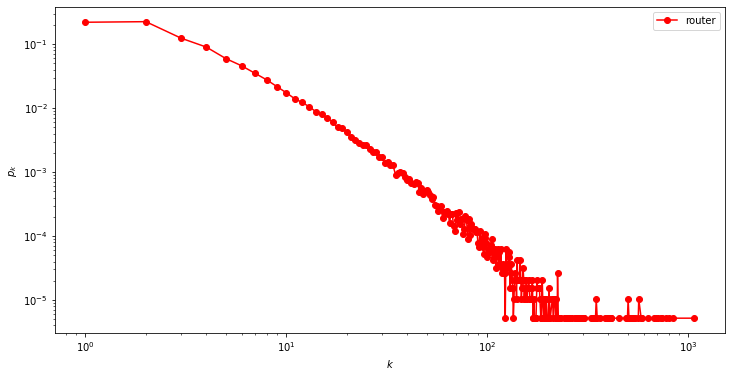

In [7]:
plt.figure(figsize=(12,6))

plt.plot(k1, Pk1, "ro-", label="router")
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")